# Popular Data Science Questions
**Our goal in this project** is to use Data Science Stack Exchange to determine 
- "What is the current trend in learning data science? "
- "What is people want to learn about in data science?"
- "Is deep learning just a fad?"

We used Stack Exchange Data Explorer to explore data for Data Science Stack Exchange (DSSE), which is a site dedicated to data science topics and their questions and answers.

after Running a few exploratory queries in Stack Exchange Data Explorer , we focused our efforts on Posts table. For examples, the Tags table looked very promising as it tells us how many times each tag was used, The tagging system used by Stack Exchange looks just like what we need to solve this problem as it allow us to quantify how many questions are asked about each subject.


# Exploring the Data
We can read in the data while immediately making sure CreationDate will be stored as a datetime object:

In [2]:
import pandas as pd

data = pd.read_csv('2019_questions.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


We see that only FavoriteCount has missing values. A missing value on this column probably means that the question was is not present in any users' favorite list, so we can replace the missing values with zero.

In [4]:
data['FavoriteCount']=data['FavoriteCount'].fillna(0).astype(int)

# Cleaning Tags column

In [5]:
data['Tags'] = data["Tags"].str.replace(r'[<>]',' ').str.strip().str.split("  ")
data['Tags'][0:6]

0                      [machine-learning, data-mining]
1    [machine-learning, regression, linear-regressi...
2         [python, time-series, forecast, forecasting]
3                [machine-learning, scikit-learn, pca]
4             [dataset, bigdata, data, speech-to-text]
5                                        [fuzzy-logic]
Name: Tags, dtype: object

In [6]:
data

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0
5,44430,2019-01-23 11:13:32,0,283,[fuzzy-logic],1,0
6,44432,2019-01-23 11:17:46,1,214,"[time-series, anomaly-detection, online-learning]",0,1
7,44436,2019-01-23 12:49:39,0,9,[matrix-factorisation],0,0
8,44437,2019-01-23 13:04:11,0,7,"[correlation, naive-bayes-classifier]",0,0
9,44438,2019-01-23 13:16:29,0,584,"[machine-learning, python, deep-learning, kera...",1,0


# Most Used and Most Viewed
As we said at the beginning, part of our goal in that project is know "What is it that people want to learn about in data science?"
so we will count tags (data scines fields) to determin  what is most used and most viwed then ploting them

In [7]:
x = {}
for index,row in data[['Tags','ViewCount']].iterrows() :
    vc = row['ViewCount']
    t = row['Tags']
    for y in t :
        if y not in x :
            x[y] = {}
            x[y]['ViewCount'] = vc
            x[y]['NoUsed'] = 1
        else :
            x[y]['ViewCount'] += vc
            x[y]['NoUsed'] += 1


In [8]:
tags = pd.DataFrame.from_dict(x,orient='index')
tags=tags.sort_values('NoUsed',ascending=False).head(20)
tags

,NoUsed,ViewCount
machine-learning,2693,388499
python,1814,537585
deep-learning,1220,233628
neural-network,1055,185367
keras,935,268608
classification,685,104457
tensorflow,584,121369
scikit-learn,540,128110
nlp,493,71382
cnn,489,70349


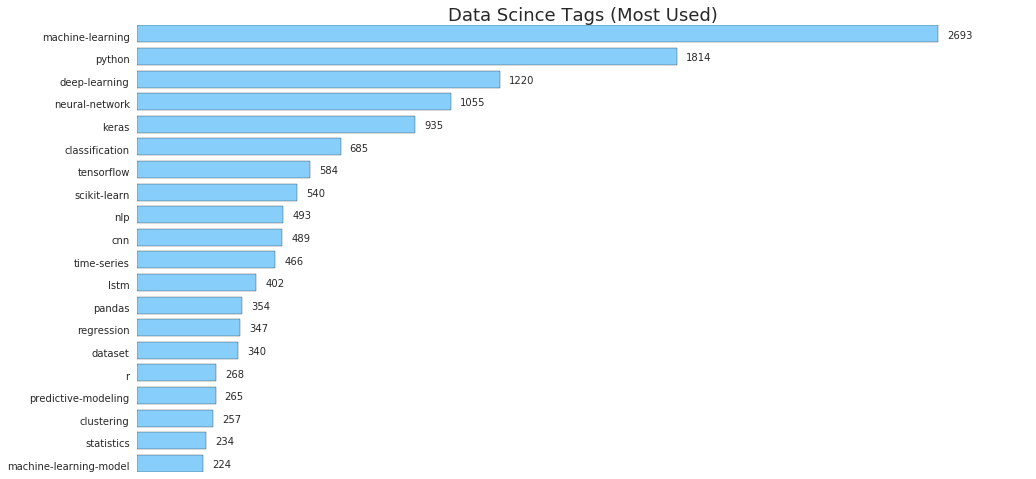

In [35]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline

# y['NoUsed'].sort_values().tail(20).plot(kind='barh', color='lightskyblue', figsize=(16,8))

c = tags['NoUsed'].sort_values().tail(20)
pos = arange(len(c.index)) + .75
fig,ax = plt.subplots(figsize=(16,8))
ax.barh(pos , c.values ,0.75, color = 'lightskyblue')
ax.set_yticks(range(1,21))
ax.set_yticklabels(list(c.index))
ax.margins(y=0)
ax.tick_params(bottom='off',top='off',right='off',left='off',labelbottom='off')
for key in ax.spines :
    ax.spines[key].set_visible(False)
for i in range(len(c.index)) :
    ax.annotate(list(c.values)[i],(list(c.values)[i]+30,pos[i]+0.2))
plt.grid(False)
ax.patch.set_facecolor('White')
plt.title('Data Scince Tags (Most Used)',fontdict ={'fontsize':18})
plt.show()

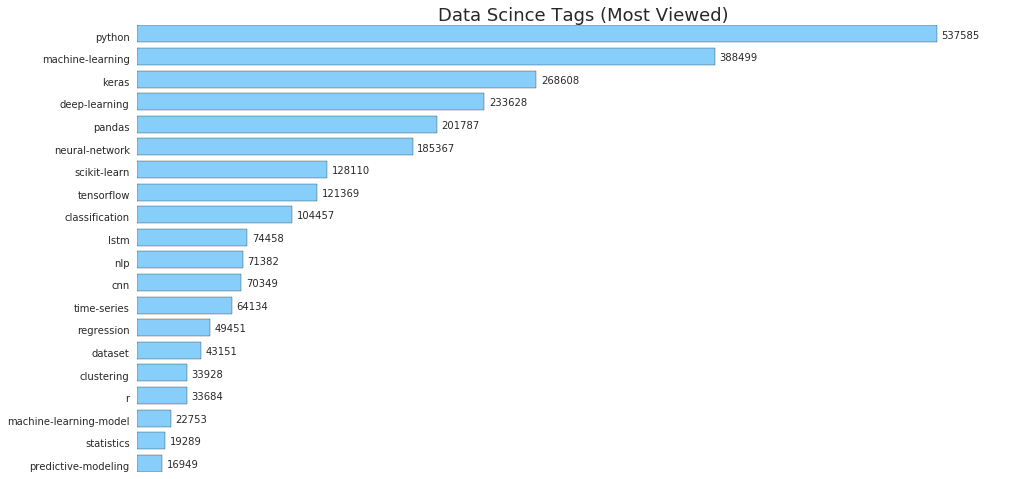

In [34]:
c = tags['ViewCount'].sort_values().tail(20)
pos = arange(len(c.index)) + .75
fig,ax = plt.subplots(figsize=(16,8))
ax.barh(pos , c.values ,0.75, color = 'lightskyblue')
ax.set_yticks(range(1,21))
ax.set_yticklabels(list(c.index))
ax.margins(y=0)
ax.tick_params(bottom='off',top='off',right='off',left='off',labelbottom='off')
for key in ax.spines :
    ax.spines[key].set_visible(False)
for i in range(len(c.index)) :
    ax.annotate(list(c.values)[i],(list(c.values)[i]+3000,pos[i]+0.2))
plt.grid(False)
ax.patch.set_facecolor('White')
plt.title('Data Scince Tags (Most Viewed)',fontdict ={'fontsize':18})
plt.show()

It is clear from the plots that there is overwhelming popularity for python , machine learning and deep learning and they now leading the trend in data scince

# Tags Relations
Now let us turn our focus to the relations between the tags (data scines fileds) and each other, should one tag be studied to understand the others and the large number of some tags is a result of mentioning them with each other or it is just Coincidence

we will start by counting how many times each tag (data scince field) appeared with the others

In [13]:
relation = pd.DataFrame(columns=tags.index, index=tags.index)
for i in relation.index :
    for z in relation.index :
        relation.loc[i,z] = sum([all(True if f in q else False for f in [i,z])for q in data['Tags']])
relation

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,2693,499,429,366,195,259,106,188,113,124,131,71,62,119,99,63,123,61,89,139
python,499,1814,160,137,280,98,167,235,71,62,105,61,244,59,53,24,35,45,35,37
deep-learning,429,160,1220,305,247,59,136,16,72,160,44,103,1,21,32,5,32,2,12,19
neural-network,366,137,305,1055,235,65,108,24,24,118,33,69,1,42,20,9,13,8,11,10
keras,195,280,247,235,935,58,256,34,23,116,51,133,3,31,13,10,11,0,3,17
classification,259,98,59,65,58,685,20,47,35,20,25,20,3,34,28,10,27,12,19,21
tensorflow,106,167,136,108,256,20,584,15,11,57,9,43,3,9,9,1,6,0,0,9
scikit-learn,188,235,16,24,34,47,15,540,12,0,12,2,37,37,9,1,12,24,6,18
nlp,113,71,72,24,23,35,11,12,493,7,0,19,3,2,11,4,1,9,3,4
cnn,124,62,160,118,116,20,57,0,7,489,8,24,1,6,11,2,6,0,1,4


In [14]:
import numpy as np
for x , y in zip(relation.index,relation.index) :
    relation.loc[x,y] = np.nan
relation

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,time-series,lstm,pandas,regression,dataset,r,predictive-modeling,clustering,statistics,machine-learning-model
machine-learning,NaN,499.0,429.0,366.0,195.0,259.0,106.0,188.0,113.0,124.0,131.0,71.0,62.0,119.0,99.0,63.0,123.0,61.0,89.0,139.0
python,499.0,NaN,160.0,137.0,280.0,98.0,167.0,235.0,71.0,62.0,105.0,61.0,244.0,59.0,53.0,24.0,35.0,45.0,35.0,37.0
deep-learning,429.0,160.0,NaN,305.0,247.0,59.0,136.0,16.0,72.0,160.0,44.0,103.0,1.0,21.0,32.0,5.0,32.0,2.0,12.0,19.0
neural-network,366.0,137.0,305.0,NaN,235.0,65.0,108.0,24.0,24.0,118.0,33.0,69.0,1.0,42.0,20.0,9.0,13.0,8.0,11.0,10.0
keras,195.0,280.0,247.0,235.0,NaN,58.0,256.0,34.0,23.0,116.0,51.0,133.0,3.0,31.0,13.0,10.0,11.0,0.0,3.0,17.0
classification,259.0,98.0,59.0,65.0,58.0,NaN,20.0,47.0,35.0,20.0,25.0,20.0,3.0,34.0,28.0,10.0,27.0,12.0,19.0,21.0
tensorflow,106.0,167.0,136.0,108.0,256.0,20.0,NaN,15.0,11.0,57.0,9.0,43.0,3.0,9.0,9.0,1.0,6.0,0.0,0.0,9.0
scikit-learn,188.0,235.0,16.0,24.0,34.0,47.0,15.0,NaN,12.0,0.0,12.0,2.0,37.0,37.0,9.0,1.0,12.0,24.0,6.0,18.0
nlp,113.0,71.0,72.0,24.0,23.0,35.0,11.0,12.0,NaN,7.0,0.0,19.0,3.0,2.0,11.0,4.0,1.0,9.0,3.0,4.0
cnn,124.0,62.0,160.0,118.0,116.0,20.0,57.0,0.0,7.0,NaN,8.0,24.0,1.0,6.0,11.0,2.0,6.0,0.0,1.0,4.0


It's hard for us to understand what is going on in this dataframe due to many numbers,Let's create a heatmap. 

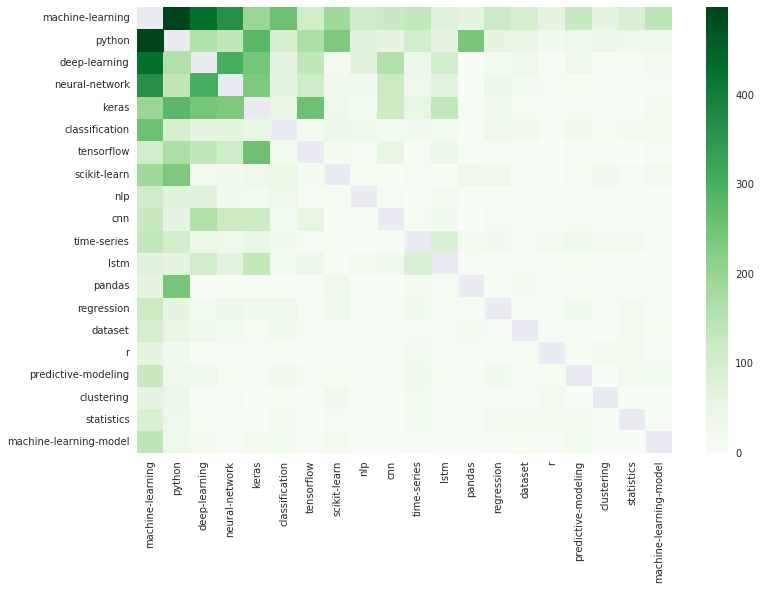

In [30]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(relation, cmap="Greens", annot=False)
plt.show()

The most used tags also seem to have the strongest relationships, as given by the dark concentration in the upper left corner. However, this could simply be because each of these tags is used a lot, and so end up being used together a lot without possibly even having any strong relation between them.

A more intuitive manifestation of this phenomenon is the following. A lot of people buy bread, a lot of people buy toilet paper, so they end up being purchased together a lot, but purchasing one of them doesn't increase the chances of purchasing the other.

Another shortcoming of this attempt is that it only looks at relations between pairs of tags and not between multiple groups of tags. For example, it could be the case that when used together, dataset and scikit-learn have a "strong" relation to pandas, but each by itself doesn't.

# Is deep learning just a fad?

now after answering the first two questions let's move to the last question .

At the glance of an eye, someone with sufficient domain knowledge can tell that the most popular topic at the moment, as shown by our analysis, is deep learning.

we want to know if it is just a fad?, Or is it really that interest in the field is increasing?

Let's read in the file into a dataframe called all_q. We'll parse the dates at read-time.

In [17]:
alldata = pd.read_csv('all_questions.csv',parse_dates=['CreationDate'])
alldata.columns = [x.lower() for x in alldata.columns]

In [18]:
alldata['creationdate'] = alldata['creationdate'].dt.strftime('%y-%m')

In [19]:
alldata = alldata[(alldata['creationdate']>'14-06')&(alldata['creationdate']<'20-01')]

In [20]:
def prase (x) :
    m = int(x[3:5])
    y = x[0:2]
    if (m >= 1) & (m <= 3) :
        return y+'Q1'
    elif (m >= 4) & (m <= 6) :
        return y+'Q2'
    elif (m >= 7) & (m <= 9) :
        return y+'Q3'
    else :
        return y+'Q4'
alldata['quartar'] = alldata['creationdate'].apply(prase)

In [21]:
alldata['tags'] = alldata['tags'].str.replace(r'[<>]',' ').str.split()

Before deciding which questions should be classified as being deep learning questions, we should decide what tags are deep learning tags.

The definition of what constitutes a deep learning tag we'll use is: a tag that belongs to the list ["lstm", "cnn", "scikit-learn", "tensorflow", "keras", "neural-network", "deep-learning"].

This list was obtained by looking at all the tags in most_used and seeing which ones had any relation to deep learning. and using Google and reading the tags descriptions to reach similar results.

In [22]:
dl = ["lstm", "cnn", "scikit-learn", "tensorflow","keras", "neural-network", "deep-learning"]
alldata['d_l_question'] = alldata['tags'].apply(lambda x : any([True if i in dl else False for i in x ]))

In [23]:
no_questions = alldata.groupby('quartar').agg({'tags':'size','d_l_question':'sum'})

In [24]:
no_questions

,tags,d_l_question
quartar,,
14Q3,189,13.0
14Q4,216,21.0
15Q1,190,18.0
15Q2,284,28.0
15Q3,311,45.0
15Q4,382,66.0
16Q1,516,110.0
16Q2,518,109.0
16Q3,585,161.0


In [25]:
no_questions['dl_percentage'] = no_questions['d_l_question']/no_questions['tags']*100

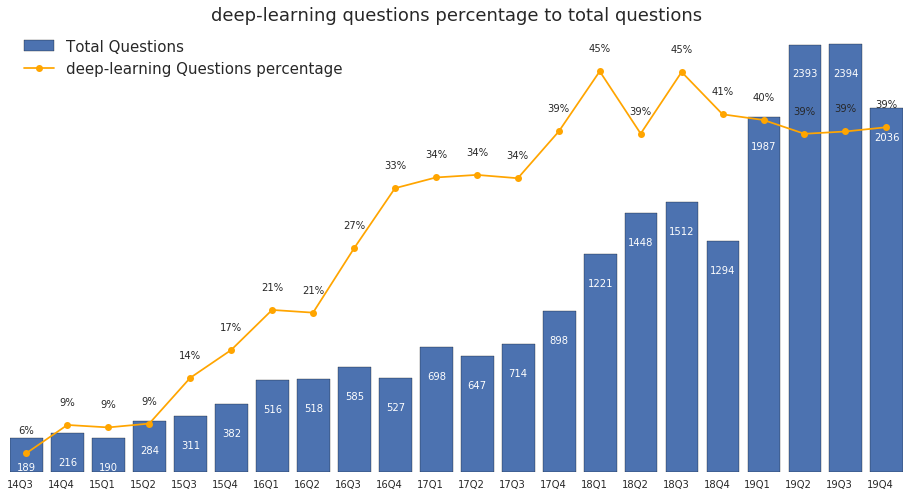

In [36]:
fig = plt.figure(figsize=(16,8))
pos = .75 + np.arange(len(no_questions))
plt.bar(pos,no_questions['tags'],label='Total Questions')
plt.xticks(range(1,len(no_questions)+1),no_questions.index)
plt.margins(x=0)
plt.grid(False)
ax = plt.gca()
ax.patch.set_facecolor('white')
plt.yticks([])
for p,v in zip(pos,no_questions['tags']):
    ax.annotate(str(v),(p+.4,v-180),ha='center',color='White')
ax2 = plt.twinx()
ax2.plot(np.arange(1.14,len(no_questions)+1),no_questions['dl_percentage'],color="orange",marker="o",label='deep-learning Questions percentage')
ax2.set_yticks([])
ax2.grid(False)
for p,v in zip(np.arange(1.14,len(no_questions)+1),no_questions['dl_percentage']) :
    ax2.annotate(str(int(v))+'%',(p,v+2),ha='center')
handles1, labels1 = ax.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
ax.legend(handles=handles1 + handles2,
           labels=labels1 + labels2,
           loc="upper left", prop={"size": 15})
ax.set_title('deep-learning questions percentage to total questions',fontdict ={'fontsize':18})
plt.show()

It seems that deep learning questions was a high-growth trend since the start of DSSE and it looks like it is plateauing. There is no evidence to suggest that interest in deep learning is decreasing . so it's not just a fad .